<h1 class="text-success text-center"> Fraud Detection - Data Exploration/Cleaning</h1>
The data was recoverred from a Kaggle competition: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

<h2> Packages used in this Notebook</h2>

* Pandas:
* Numpy:
* Pickle:
* Matplotlib:
* Tensorflow:
* Keras:
* Scikit-learn:
* Seaborn: For statistical representations

In [28]:
import pandas as pd
import numpy as np
import pickle
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
np.random.seed(10)

<h2>Data Description</h2>
Data recorder during 2 days in September 2013

Dataset <b>highly unbalanced</b>: 492 frauds out of 284807 transactions (0.172% of transactions).

The dataset contains 28 variables which are the result of a PCA transformation. No prior knowledge about the original features (due to confidentiality).

Input variables:
* <b>Features V1,...,V28:</b> Principal components from the PCA transformation.
* <b>Time:</b> Seconds elapsed between each transactions since the first transaction.
* <b>Amount:</b> Transaction amount.
* <b>Class:</b>1 if is a fraud, 0 otherwise.

<b>Recommended metric:</b> Area Under the Precision-Recall Curve (AUPRC)

<h2>Data Exploration</h2>
To access the data, please use the following packages:

* s3fs (boto3 installed by default)

This package allows us to access the data in S3 (axiods directory).

In [2]:
#data = pd.read_csv("s3://axiods/detection_de_fraude/creditcard.csv")
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checking null or missing values in the dataset:

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Looking the distribution for the <b>time</b> feature:

In [5]:
print("Fraud transactions:")
print(data.Time[data.Class==1].describe())
print("Normal transactions:")
print(data.Time[data.Class==0].describe())

Fraud transactions:
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
Normal transactions:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


Text(0,0.5,'Nb transactions')

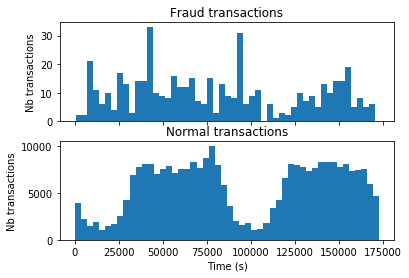

In [6]:
nb_bins = 50
f, ax = plt.subplots(2,1,sharex=True)
ax[0].hist(data.Time[data.Class==1],bins=nb_bins)
ax[0].set_title("Fraud transactions")
ax[0].set_ylabel("Nb transactions")

ax[1].hist(data.Time[data.Class==0],bins=nb_bins)
ax[1].set_title("Normal transactions")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Nb transactions")

Looking the distribution for the <b>amount</b> feature:

In [7]:
print("Fraud transactions:")
print(data.Amount[data.Class==1].describe())
print("Normal transactions:")
print(data.Amount[data.Class==0].describe())

Fraud transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Normal transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


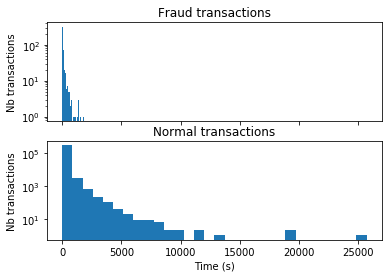

In [8]:
nb_bins = 30
f, ax = plt.subplots(2,1,sharex=True)
ax[0].hist(data.Amount[data.Class==1],bins=nb_bins)
ax[0].set_title("Fraud transactions")
ax[0].set_ylabel("Nb transactions")
ax[0].set_yscale('log')

ax[1].hist(data.Amount[data.Class==0],bins=nb_bins)
ax[1].set_title("Normal transactions")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Nb transactions")
ax[1].set_yscale('log') # Only for visualization purposes

<h3>Plotting the distribution for each anonymized feature</h3>

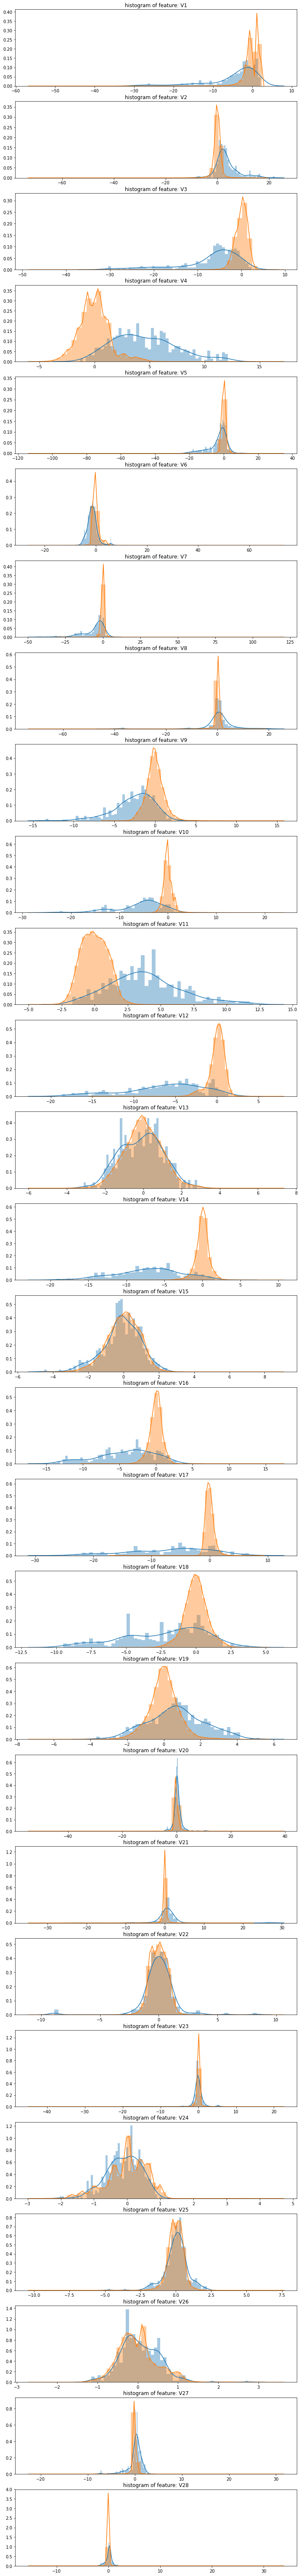

In [9]:
#Select only the anonymized features.
v_features = data.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

<h3>Plotting the correlation between each anonymized feature</h3>
Considering only the first 5 features:

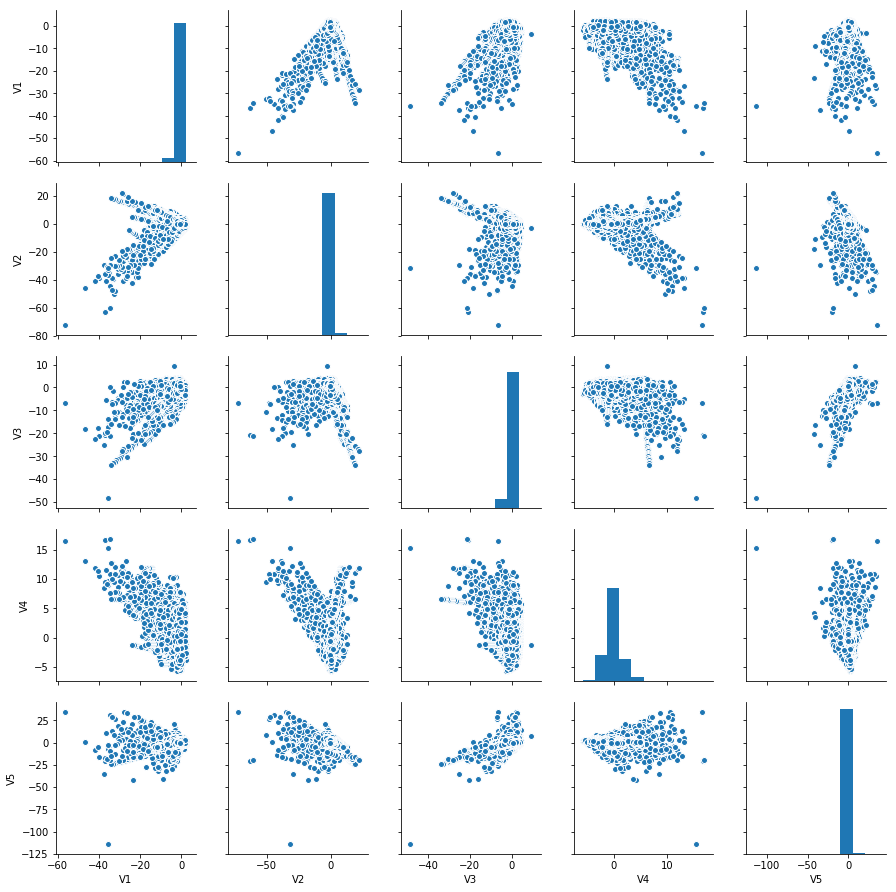

In [10]:
sns.pairplot(data[v_features[0:5]])

<h2>Visualizing the data using t-SNE</h2>
For the visualization purpose, we select all the fraudulent transactions and a sample of 10000 normal transactions. Furthermore, we remove the 'Class' column of the dataframe.

In [11]:
tsne_data = pd.read_csv("data/creditcard.csv")
df_tsne = tsne_data[tsne_data.Class==1]
df_tsne = pd.concat([df_tsne,tsne_data[tsne_data.Class==0].sample(n=10000)], axis=0)
y = df_tsne.Class
df_tsne.drop(['Class'],axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00


In [12]:
# Scale features to improve the training ability of t-SNE - SEE IF IT IS NECESSARY
stdScaler = StandardScaler()
df_tsne = stdScaler.fit_transform(df_tsne)

tsne = TSNE(n_components=2, random_state=0)
x_tsne_2d = tsne.fit_transform(df_tsne)

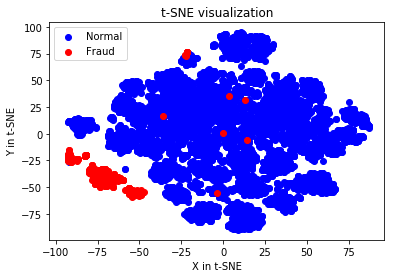

In [13]:
plt.figure()
plt.scatter(x = x_tsne_2d[y==0,0], y = x_tsne_2d[y==0,1],c='b',label='Normal')
plt.scatter(x = x_tsne_2d[y==1,0], y = x_tsne_2d[y==1,1],c='r',label='Fraud')
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization')
plt.show()

<h1>Data preparation for the Neural Network</h1>

Formating the dataframe:

In [14]:
# Formating the output for the neural network: 1 column for a fraud
# transactions and another one for normal transactions
Y = np.array(data.Class)
Y = np.reshape(Y,(len(Y),1))
Y_ = np.zeros((len(Y),1))
Y_[Y==1] = 0
Y_[Y==0] = 1

X = data.drop("Class",axis=1)

Y = np.concatenate([Y,Y_],axis=1)

print("X size:",np.shape(X))
print("Y size:",np.shape(Y))

X size: (284807, 30)
Y size: (284807, 2)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.04)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test,test_size=0.5)

print("Dataset train size:",np.shape(X_train))
print("Dataset test size:",np.shape(X_test))
print("Dataset val size:",np.shape(X_val))

Dataset train size: (273414, 30)
Dataset test size: (5696, 30)
Dataset val size: (5697, 30)


Checking if there is a Class==1 in every dataset train/val/test:

In [16]:
print("Nb Class in train set",np.sum(Y_train[(Y_train[:,0]==1),0]))
print("Nb Class in test set",np.sum(Y_test[(Y_test[:,0]==1),0]))
print("Nb Class in val set",np.sum(Y_val[(Y_val[:,0]==1),0]))

Nb Class in train set 472.0
Nb Class in test set 11.0
Nb Class in val set 9.0


<b>Centring the data</b> for the train/test/dev sets:

In [17]:
# Getting all the features names
features = X_train.columns.values

# Centring the data: around a mean 0 and a standard deviation of 1
for f in features:
    mean, std = data[f].mean(), data[f].std()
    X_train.loc[:,f] = (X_train[f] - mean)/std
    X_test.loc[:,f] = (X_test[f] - mean)/std
    X_val.loc[:,f] = (X_val[f] - mean)/std

/Users/jeancupe/ddf_env/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [18]:
X_train = X_train.as_matrix()
X_val = X_val.as_matrix()
X_test = X_test.as_matrix()

<h1>Implementing a Neural Network</h1>

Setting the <b>parameters</b> for the Neural Network architecture:

In [19]:
# Using all the features in the input data
input_nodes = np.shape(X_train)[1]
output_nodes = 2

# Defining a layer ratio for the hidden layers
layer_ratio = 1.5

# Defining the number of hidden layers to 3
hidden_nodes1 = int(input_nodes/2)
hidden_nodes2 = int(hidden_nodes1*layer_ratio)
hidden_nodes3 = int(hidden_nodes2*layer_ratio)

# Defining the probability to keep in a dropout layer
pkeep = tf.placeholder(tf.float32)

<b>Defining the Neural Network architecture:</b>

In [20]:
# Defining the INPUT
x = tf.placeholder(tf.float32, [None,input_nodes])

# Layer 1 - TRY TO CHANGE THE ACTIVATION FUNCTION
W1 = tf.Variable(tf.truncated_normal([input_nodes,hidden_nodes1], stddev=0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
a1 = tf.nn.sigmoid(tf.matmul(x,W1) + b1)

# Layer 2 - TRY TO CHANGE THE ACTIVATION FUNCTION
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1,hidden_nodes2], stddev=0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
a2 = tf.nn.sigmoid(tf.matmul(a1,W2) + b2)

# Layer 3 - TRY TO CHANGE THE ACTIVATION FUNCTION
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2,hidden_nodes3], stddev=0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
a3 = tf.nn.sigmoid(tf.matmul(a2,W3) + b3)

# Layer 4 - Output layer: Setting two outputs for a multi-task application
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3,output_nodes], stddev=0.15))
b4 = tf.Variable(tf.zeros([output_nodes]))
a4 = tf.nn.softmax(tf.matmul(a3,W4) + b4)

y = a4
y_ = tf.placeholder(tf.float32, [None,2]) # Use in the fitting process

<b>Setting the parameters for the training:</b>

In [21]:
training_epochs = 50 # 2000
training_dropout = 0.9
display_step = 10
n_samples = np.shape(Y_train)[0]
batch_size = 2048 # Number of samples to charge in the memory
learning_rate = 5e-3

<b>Defining the COST function and the OPTIMIZER</b>

In [22]:
# Cross-entropy loss due to a multi-task classification
cost = -tf.reduce_sum(y_ * tf.log(y))

# Setting an AdamOptimzer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct predictions comparing the output and the target values
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# Defining tracking variables
acc_summary = []
cost_summary = []
val_acc_summary = []
val_cost_summary = []
stop_early = 0

# Saving the best model
checkpoint = "./best_model.ckpt"
saveBest = tf.train.Saver(max_to_keep=1)

In [24]:
# Initializing variables and the tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        for batch in range(int(n_samples/batch_size)):
            batch_x = X_train[batch*batch_size:(batch+1)*batch_size]
            batch_y = Y_train[batch*batch_size:(batch+1)*batch_size]
            
            sess.run([optimizer], feed_dict={x:batch_x,
                                             y_:batch_y,
                                             pkeep:training_dropout})
            
        # Display LOSS every 'display_step' epochs
        if epoch%display_step == 0:
            train_acc, train_cost = sess.run([accuracy,cost],
                                            feed_dict={x:X_train,
                                                       y_:Y_train,
                                                       pkeep:training_dropout})
            val_acc, val_cost = sess.run([accuracy,cost],
                                            feed_dict={x:X_val,
                                                       y_:Y_val,
                                                       pkeep:1})

            print("Epoch: ",epoch)
            print("------")
            print("Train Accuracy: {:.5f}".format(train_acc),
                  "Train Cost: {:.5f}".format(train_cost),
                  "Val Accuracy: {:.5f}".format(val_acc),
                  "Val Cost: {:.5f}".format(val_cost))
        
            # Saving best model
            if epoch > 0 and val_acc > max(val_acc_summary):
                print("The val accuracy has been improved. Saving best model.")
                saveBest.save(sess, checkpoint)
        
            acc_summary.append(train_acc)
            cost_summary.append(train_cost)
            val_acc_summary.append(val_acc)
            val_cost_summary.append(val_cost)
                
            if val_acc < max(val_acc_summary) and epoch > 100:
                stop_early += 1
                if stop_early == patience_epoch:
                    print("Stopping Early")
                    break
            else:
                stop_early = 0        
        
    print("-"*30)
    print("Optimization Finished!!!!")
    print("-"*30)

Epoch:  0
------
Train Accuracy: 0.99827 Train Cost: 3393.75513 Val Accuracy: 0.99842 Val Cost: 65.82220
Epoch:  10
------
Train Accuracy: 0.99827 Train Cost: 1141.18311 Val Accuracy: 0.99842 Val Cost: 17.69419
Epoch:  20
------
Train Accuracy: 0.99946 Train Cost: 636.96173 Val Accuracy: 0.99947 Val Cost: 9.58948
The val accuracy has been improved. Saving best model.
Epoch:  30
------
Train Accuracy: 0.99955 Train Cost: 533.39325 Val Accuracy: 0.99965 Val Cost: 8.12392
The val accuracy has been improved. Saving best model.
Epoch:  40
------
Train Accuracy: 0.99961 Train Cost: 476.70660 Val Accuracy: 0.99947 Val Cost: 8.18168
------------------------------
Optimization Finished!!!!
------------------------------


Loading the best model to see the performance in the validation set: (Visualization of the accuracy):

In [27]:
with tf.Session() as sess:
    # Load the best weights - checkpoint file
    saveBest.restore(sess, checkpoint)
    train_acc, train_cost = sess.run([accuracy,cost],
                                      feed_dict={x:X_train,y_:Y_train,
                                                 pkeep:training_dropout})
    val_acc, val_cost = sess.run([accuracy,cost],
                                  feed_dict={x:X_val,y_:Y_val,
                                             pkeep:1})
    print("Results using the best model for val_acc:")
    print("-"*30)
    print("Training accuracy: {:.5f}".format(train_acc),
          "Training cost: {:.5f}".format(train_cost))
    print("Val accuracy: {:.5f}".format(val_acc),
          "Val cost: {:.5f}".format(val_cost))

INFO:tensorflow:Restoring parameters from ./best_model.ckpt
Results using the best model for val_acc:
------------------------------
Training accuracy: 0.99955 Training cost: 533.39325
Val accuracy: 0.99965 Val cost: 8.12392


<b>Predicting values for the test set - Defining the metric</b>

The metric recommended by Kaggle is the Area Under the Precision-Recall Curve (AUPRC). This metric is more useful than AUC for ROC (Receiver Operating Characteristic) curves when we face an unbalace dataset.
Reference: [The Relationship Between Precision-Recall and ROC curves](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)

<b>NOTE:</b> Refer to this video for a better understanding of the [ROC curve](http://www.dataschool.io/roc-curves-and-auc-explained/)

In [31]:
# Defining the tensorflow element for predictions
predicted = tf.argmax(y,1)

with tf.Session() as sess:
    # Load the best weights
    saveBest.restore(sess, checkpoint)
    Y_test_pred, test_acc = sess.run([predicted,accuracy],
                                     feed_dict={x:X_test,y_:Y_test,
                                                pkeep:1})
    
    print("Test acc: {:.5f}".format(test_acc))
    #print(Y_test)
    #print(Y_test_pred)
    print("F1 score: {:.5f}".format(f1_score(Y_test[:,1],Y_test_pred)))
    print("Confusion matrix:",confusion_matrix(Y_test[:,1],Y_test_pred))

INFO:tensorflow:Restoring parameters from ./best_model.ckpt
Test acc: 0.99912
F1 score: 0.99956
Confusion matrix: [[   7    4]
 [   1 5684]]
